In [1]:
import numpy as np

# Matrice de transformation A (ex: rotation de 45°)
A = np.array([[1, 1], [0, 1]])  # Matrice quelconque (det ≠ 0)
A_inv = np.linalg.inv(A)

# Vecteur contravariant v et base e
v = np.array([2, 3])
e1, e2 = np.array([1, 0]), np.array([0, 1])

# Cadre 1: Base transformée par A, composantes par A^{-1}
e1_prime = A[0,0]*e1 + A[1,0]*e2  # Nouvelle base
e2_prime = A[0,1]*e1 + A[1,1]*e2
v_prime = A_inv @ v  # Nouvelles composantes

print("Cadre 1 - v' =", v_prime)  # Composantes contravariantes transformées

Cadre 1 - v' = [-1.  3.]


In [5]:
A[0,0], A[1,0], A[0,1], A[1,1]  # Composantes de la matrice A

(np.int64(1), np.int64(0), np.int64(1), np.int64(1))

In [4]:
A, A_inv, v, e1,e2, e1_prime, e2_prime, v_prime

(array([[1, 1],
        [0, 1]]),
 array([[ 1., -1.],
        [ 0.,  1.]]),
 array([2, 3]),
 array([1, 0]),
 array([0, 1]),
 array([1, 0]),
 array([1, 1]),
 array([-1.,  3.]))

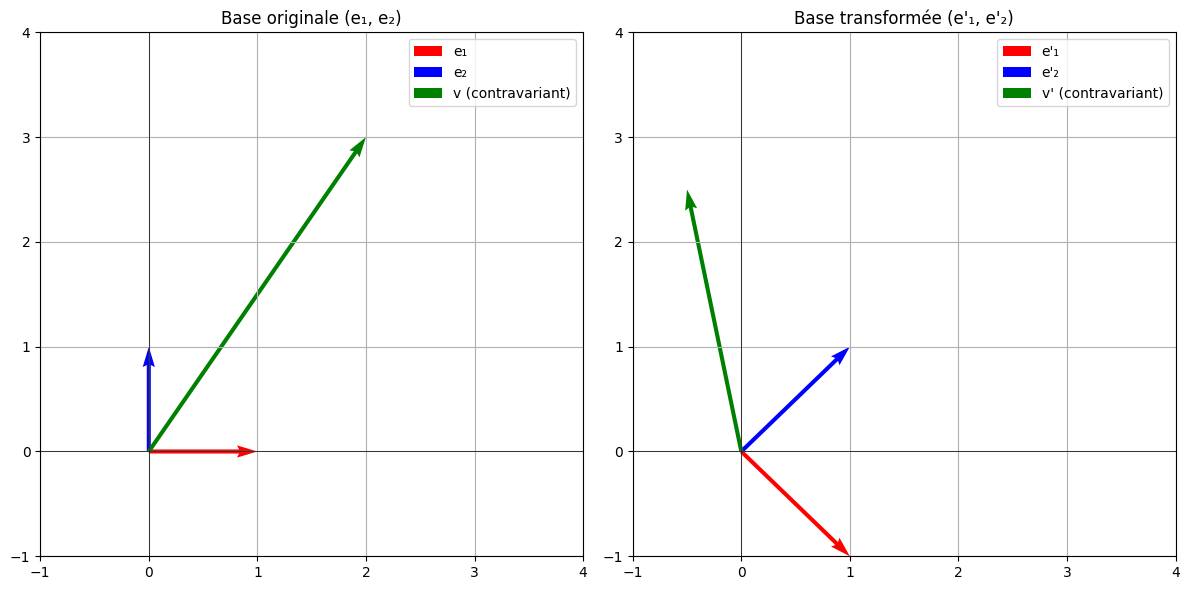

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration des graphiques
plt.figure(figsize=(12, 6))

### 1. Repère initial (base canonique) ###
plt.subplot(121)
plt.title("Base originale (e₁, e₂)")
plt.grid(True)

# Base canonique
e1 = np.array([1, 0])
e2 = np.array([0, 1])

# Vecteur contravariant v dans la base canonique
v = np.array([2, 3])

# Affichage
plt.quiver(0, 0, e1[0], e1[1], angles='xy', scale_units='xy', scale=1, color='r', label='e₁')
plt.quiver(0, 0, e2[0], e2[1], angles='xy', scale_units='xy', scale=1, color='b', label='e₂')
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='g', label='v (contravariant)')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

### 2. Nouveau repère (base transformée) ###
plt.subplot(122)
plt.title("Base transformée (e\'₁, e\'₂)")
plt.grid(True)

# Matrice de transformation A (ex: cisaillement)
A = np.array([[1, 0.5], 
              [0, 1.2]])
A_inv = np.linalg.inv(A)

# Matrice de transformation A (ex: rotation de 45°)
A = np.array([[1, 1], [-1, 1]])  # Matrice quelconque (det ≠ 0)
A_inv = np.linalg.inv(A)

# Nouvelle base
e1_prime = A @ e1
e2_prime = A @ e2

# Composantes contravariantes transformées
v_prime = A_inv @ v  # v'ⁱ = (A⁻¹)ⁱⱼ vʲ

# Affichage
plt.quiver(0, 0, e1_prime[0], e1_prime[1], angles='xy', scale_units='xy', scale=1, color='r', label='e\'₁')
plt.quiver(0, 0, e2_prime[0], e2_prime[1], angles='xy', scale_units='xy', scale=1, color='b', label='e\'₂')
plt.quiver(0, 0, v_prime[0], v_prime[1], angles='xy', scale_units='xy', scale=1, color='g', label='v\' (contravariant)')

plt.xlim(-1, 4)
plt.ylim(-1, 4)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
v_prime

array([-0.5,  2.5])

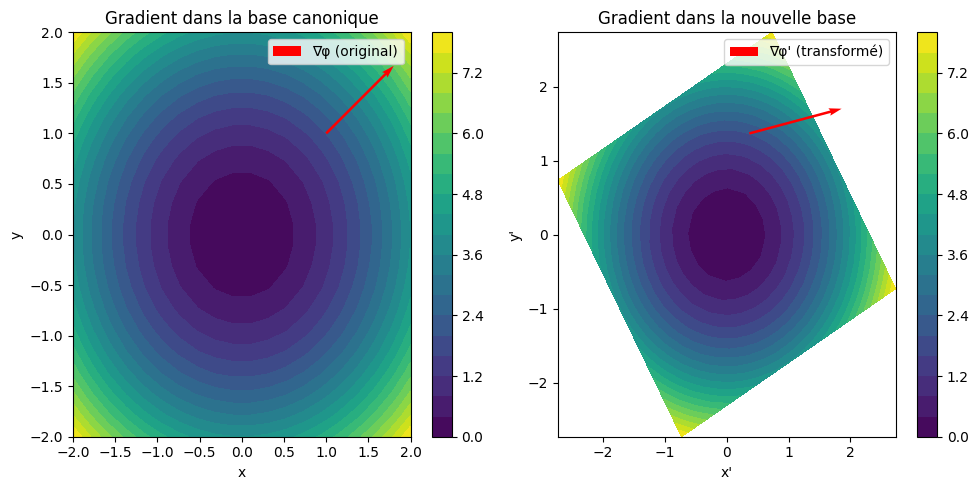

In [15]:

# Fonction scalaire phi(x, y) = x^2 + y^2
def phi(x, y):
    return x**2 + y**2

# Gradient de phi (covariant) en (x=1, y=1)
grad_phi = np.array([2*1, 2*1])  # [dphi/dx, dphi/dy] = [2, 2]

# Matrice de transformation A (ex: rotation de 30° + cisaillement)
theta = np.pi/6  # 30°
A = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta),  np.cos(theta)]
])

# Transformation du gradient (covariant: grad'_i = A^j_i grad_j)
grad_phi_prime = A.T @ grad_phi  # A.T car on travaille avec les indices covariants

# Points pour le tracé
x = np.linspace(-2, 2, 20)
y = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x, y)
Z = phi(X, Y)

# Affichage
plt.figure(figsize=(10, 5))

# Avant transformation
plt.subplot(121)
plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar()
plt.quiver(1, 1, grad_phi[0], grad_phi[1], color='red', scale=10, label='∇φ (original)')
plt.title("Gradient dans la base canonique")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Après transformation
plt.subplot(122)
# Transformation des coordonnées du plan
X_prime = A[0,0]*X + A[0,1]*Y
Y_prime = A[1,0]*X + A[1,1]*Y
plt.contourf(X_prime, Y_prime, Z, levels=20, cmap='viridis')  # Z reste invariant
plt.colorbar()
plt.quiver(A[0,0]*1 + A[0,1]*1, 
           A[1,0]*1 + A[1,1]*1,
           grad_phi_prime[0], grad_phi_prime[1], 
           color='red', scale=10, label='∇φ\' (transformé)')
plt.title("Gradient dans la nouvelle base")
plt.xlabel('x\'')
plt.ylabel('y\'')
plt.legend()

plt.tight_layout()
plt.show()